16:10:25.437 [BoBRobotics::Navigation::ImageDatabase::ImageDatabase@238] Using image database at ../datasets/ant_world/routes/ant1_route1
Using cached result from '.navbench_cache/799369241.py_get_trained_network_e8e62766d963bf9374fbbe5084fd2c9a7047ab3955e75cb4138cfcfd022abfac.pkl'
get_trained_network() took 59.7122 s to run (without caching)
Using cached result from '.navbench_cache/799369241.py_get_infomax_headings_156b6fc9ae0554c6c1af0f6cda0d85a5e48b0ba17e163cd572337e023b8d3a37.pkl'
get_infomax_headings() took 0.469879 s to run (without caching)


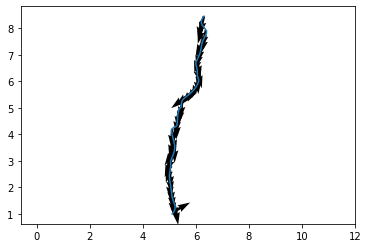

In [2]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np

import navbench as nb
import navbench.imgproc as ip
from navbench.infomax import InfoMax

IM_SIZE = (90, 25)
PREPROC = ip.resize(*IM_SIZE)

db = nb.Database('../datasets/ant_world/routes/ant1_route1')
train_entries = db.read_image_entries(preprocess=PREPROC, to_float=False)
images = train_entries.image.to_list()

ann = nb.get_trained_network(images, learning_rate=InfoMax.DEFAULT_LEARNING_RATE, seed=42)

test_entries = train_entries.iloc[::20]
heads_infomax = nb.get_infomax_headings(ann, test_entries)

_, ax = plt.subplots()

ax.plot(db.x, db.y)
nb.anglequiver(ax, test_entries.x, test_entries.y, heads_infomax)
ax.axis('equal');